# Kom igång med Python

I detta inlägget går vi igenom hur man snabbt kommer igång med Python. Det finns redan otaliga tutorials och forum som går igenom allt från det mest grundläggande man behöver veta för att använda python i sin dataanalys till de mest komplicerade ämnen, google is your friend! Fastnar man med något problem så finns det nästan alltid någon annan som brottats med samma, gör en sökning på nätet och inkludera python i sökraden så hittar du med säkerhet en lösning. Har du frågor kan du självklart även kontakta mig (ida.lundholm-benzi@ferrologic.se).

Snabba tips:

* Ett superbra forum att använda sig av är [Stack Overflow](https://stackoverflow.com/)
* [Pythons officiella sida](https://www.python.org/about/gettingstarted/) har mycket hjälp för både nybörjare och experter 
* Det finns även inbyggd hjälp i python som är bra att använda sig av för att veta mer om en specifik funktion man vill använda, skriv bara ? följt av funktionens namn, exempel:


![img1](images/help_function.png)



# Installera python

Har du en dator med UNIX system så finns python oftast redan installerat och även vissa Windows datorer kommer med en python installation. Har man inte python installerat så rekommenderar jag att man laddar ner [Anaconda](https://docs.anaconda.com/anaconda/install/) så får man både python och en pakethanterare för pythons olika moduler.

# Jupyter notebook
Jupyter notebooks är ett superbra verktyg för att interaktivt utveckla och presentera data science projekt. Installera jupyter notebook enkelt genom att öppna anaconda prompt och skriv: 
> `conda install -c conda-forge notebook`
  
Starta jupyter notebook och öppna en ny Python 3 notebook för att komma igång!  
![img2](images/new_notebook.png)
I notebook kan man sedan alternera mellan att skriva och exekvera kod med vanlig text.
Testa genom att t ex skriva print('Hello world!') i första cellen och tryck sedan Ctrl+Enter för att exekvera  
![img3](images/hello_world.png)
[Här](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook) finns en utförlig och bra tutorial för hur man använder jupyter notebooks.

# Använda bibliotek
När man installerar python får man även med en rad vanliga bibliotek som man kan tänkas behöva. Saknas ett paket kan man installera det via sin pakethanterare (t ex conda) eller exempelvis [direkt i jupyter notebook.](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/ )

För att sedan använda biblioteket behöver man importera dem genom att skriva 
`import` följt av bibliotekets namn.

# Exempel från Smart Energi

Vi kommer att kika på data som kommer från Smart Energi. Datat innehåller konsumption över tid samt utomhustemperatur för en fjärrvärmemätstation i Göteborg. Det är en `csv`-fil som finns att ladda ner [här](https://drive.google.com/drive/folders/1gklGgsdYH3PoOwrGlySWqQnFn0nckbXX?usp=sharing), observera att du måste ha en ferrologic-adress för att ladda ner data.

Vi kommer nu använda python biblioteket pandas för data manipulering och analys samt matplotlib för visualisering. Importera pandas och läs in csv filen till en pandas data frame. Det är bra praxis att titta på innehållet i sin data frame innan man börjar sin analys. Få en översikt av din data frame med funktionen info och titta på de första raderna med hjälp av head till exempel. 

In [1]:
import pandas as pd

tds9 = pd.read_csv('tds9.csv', parse_dates=['timestamp', 'consumption_from', 'consumption_to'])
tds9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 13 columns):
property_temp              2060 non-null object
timestamp                  2062 non-null datetime64[ns]
unit_of_measure_weather    2060 non-null object
temperature                2060 non-null float64
weather_station_agency     2060 non-null object
weather_station_id         2060 non-null object
metering_point_id          2062 non-null object
property                   2062 non-null object
unit_of_measure            2062 non-null object
value                      2062 non-null float64
consumption_from           2062 non-null datetime64[ns]
consumption_to             2062 non-null datetime64[ns]
consumption_value          2062 non-null float64
dtypes: datetime64[ns](3), float64(3), object(7)
memory usage: 209.5+ KB


Det är standard att importera pandas biblioteket med alias pd så vi gör det även här. För att selektera särskilda kolumner i en DataFrame kan man skriva namnet på kolumnerna inom hakparanteser ex tds9['consumption_value']. Med pandas kan man använda method chaining där funktioner kan kedjas efter varandra så att individuella objekt ej behöver skapas efter varje operation ([här](https://towardsdatascience.com/the-unreasonable-effectiveness-of-method-chaining-in-pandas-15c2109e3c69) kan man läsa mer om method chaining). Detta är liknande funktionalitet som man får med the pipe `%>%` i R.

Just detta data är tidsberoende och för att effektivt göra tidsserie manipulationer med pandas så behöver vi göra om datumet som finns i kolumnen `timestamp` till dataFramens index. Datat innehåller konsumtions värden för både energi och flöde, för att endast titta på energi filtrerar vi först på kolumnen `property`. För att sedan t ex se median konsumtionen och temperatur per månad samplar vi om data på just månad med hjälp av resample funktionen. Argumentet 'M' säger åt funktionen att sampla per slutet av varje månad (fler frekvenssträngar kan man hitta [här](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)). Därefter väljer vi ut vilka kolumner vi vill summera samt lägger till en summerings funktion. 

In [2]:
tds9.index = tds9['timestamp']
tds9_energy = tds9[tds9.property == 'energy']
tds9_energy.resample('M')['temperature','consumption_value'].median().tail()


,temperature,consumption_value
timestamp,,
2018-10-31,10.427925,1.700
2018-11-30,7.864353,2.255
2018-12-31,2.901784,3.030
2019-01-31,0.742575,3.360
2019-02-28,3.060813,3.110


## Visualisering
Det finns flera python bibliotek för visualisering i python, några av de vanligare är:
 * Matplotlib: "low level", har stor möjlighet för anpassning men kräver därför mer kod
 * Pandas Visualization: enkelt att använda med pandas data frames, bygger på matplotlib
 * Seaborn: "high level", enklare och snyggare
 * ggplot: baserat på R's visualisering
 * Plotly: för interaktiva visualiseringar
 
Då vi jobbar med en pandas Data Frame är det enklast att visualisera med hjälp av den inbyggda plot funktionen, här med konsumtion mot utomhustemperatur:

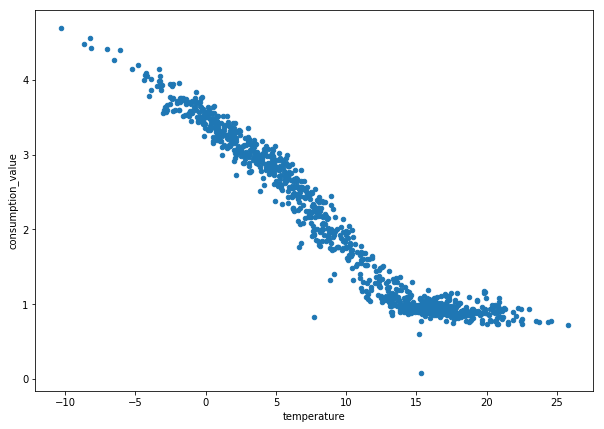

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline
tds9_energy.plot(x='temperature', y='consumption_value', kind='scatter', figsize=(10,7))

Vill man till exempel färglägga olika datapunkter efter temperaturintervall är det enklare att använda seaborn som har ett argument för just kategorier (hue). Här även med definierade titlar och namn för axlarna:

C:\Users\idalu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5,1,'Relation mellan utomhustemperatur och fjärrvärmekonsumtion')

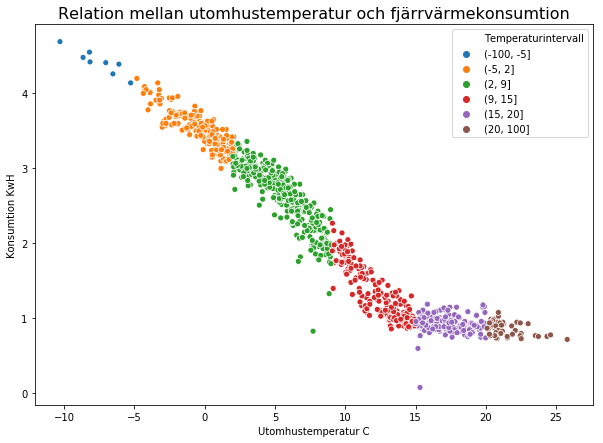

In [4]:
import seaborn as sns

fig = plt.figure(figsize = (10,7))
tds9_energy['Temperaturintervall'] = pd.cut( tds9_energy['temperature'], [-100, -5, 2, 9, 15, 20, 100])
ax = sns.scatterplot(x = 'temperature', y = 'consumption_value', hue='Temperaturintervall', data = tds9_energy)
ax.set_xlabel('Utomhustemperatur C')
ax.set_ylabel('Konsumtion KwH')
ax.set_title('Relation mellan utomhustemperatur och fjärrvärmekonsumtion', size=16)


## Modellering

För modellering och Machine Learning i python används det kraftfulla biblioteket sci kit learn som kommer med hundratals olika modeller. Vi kan testa att anpassa en enkel linjär regressions modell till konsumtionen som funktion av utomhustemperatur. Att få fram sammanfattad statistik för sin modell kräver fler rader kod jämfört med r då scikit learn inte har någon funktion likt summary(lm_model) men man kan ta fram det man önskar med metrics från scikit learn.  

R - squared: 0.9386104770477575
Root Mean Squared Error: 0.2611889266890058


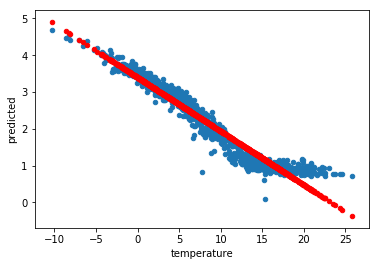

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

data = tds9_energy[['temperature', 'consumption_value']].dropna()
x = data['temperature'].values.reshape(-1,1)
y = data['consumption_value'].values.reshape(-1,1)

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(x, y)

# Make predictions
predicted = model.predict(x)

# Summarize the fit of the model
print('R - squared:', metrics.r2_score(y, predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predicted)))

data['predicted'] = predicted
ax = data.plot(x = 'temperature', y = 'consumption_value', kind = 'scatter')
data.plot('temperature', 'predicted', kind='scatter', color = 'r', ax=ax)


Som vi kan se är en linjär regression inte så lämplig i detta fall. För att fånga den riktiga effektsignaturen skulle man antigen behöva dela upp regressionen i olika temepraturintervall, eller använda sig av en icke-linjär metod.

/Ida